# Preparing 'basic' dataset

In [1]:
# importing dataset
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/fbarth/ml-espm/master/dataset/german_credit_data.csv")

# fixing messy columns
df = df.drop(columns=['Unnamed: 0'])
df = df.rename(columns={
    "Age": "age", 
    "Sex": "sex", 
    "Job": "job", 
    "Housing": "housing", 
    "Saving accounts": "savingAccount",
    "Checking account": "checkingAccount",
    "Credit amount": "creditAmount",
    "Duration": "duration",
    "Purpose": "purpose",
    "Risk": "risk"
})

# accounts into ordered numbers
cleanup_nums = {"savingAccount": 
                {"little": 1, "moderate": 2, "quite rich": 3, "rich": 4}
               }
df.replace(cleanup_nums, inplace=True)
cleanup_nums = {"checkingAccount": 
                {"little": 1, "moderate": 2, "quite rich": 3, "rich": 4}
               }
df.replace(cleanup_nums, inplace=True)

# one_hot for all possible categoric variables
d_attr = pd.get_dummies(df[['sex','housing','purpose']], prefix=['sex','housing','purpose'])
df_risk = df['risk']

df = df.drop(columns=['sex','purpose', 'housing', 'risk'])
df = pd.concat([df, d_attr], axis=1)
df.head()

,age,job,savingAccount,checkingAccount,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,67,2,NaN,1.0,1169,6,0,1,0,1,0,0,0,0,0,0,1,0,0
1,22,2,1.0,2.0,5951,48,1,0,0,1,0,0,0,0,0,0,1,0,0
2,49,1,1.0,NaN,2096,12,0,1,0,1,0,0,0,0,1,0,0,0,0
3,45,2,1.0,1.0,7882,42,0,1,1,0,0,0,0,0,0,1,0,0,0
4,53,2,1.0,1.0,4870,24,0,1,1,0,0,0,1,0,0,0,0,0,0


In [23]:
# scaling data
from sklearn import preprocessing
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df), 
                              index=df.index, 
                              columns=df.columns)
# base 'head' of dataset
df_scaled = pd.concat([df_scaled, df_risk], axis=1)
df_scaled.head()

,age,job,savingAccount,checkingAccount,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,risk
0,0.857143,0.666667,NaN,0.000000,0.050567,0.029412,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,good
1,0.053571,0.666667,0.0,0.333333,0.313690,0.647059,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,bad
2,0.535714,0.333333,0.0,NaN,0.101574,0.117647,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,good
3,0.464286,0.666667,0.0,0.000000,0.419941,0.558824,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,good
4,0.607143,0.666667,0.0,0.000000,0.254209,0.294118,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bad


# 1.0 - Onehot, ignoring missing values

In [26]:
# removing columns savingAccount e checkingAccount 
df_ignore = df_scaled.copy()
df_ignore = df_ignore.drop(columns=['savingAccount', 'checkingAccount'])
df_ignore.head()

,age,job,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,risk
0,0.857143,0.666667,0.050567,0.029412,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,good
1,0.053571,0.666667,0.313690,0.647059,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,bad
2,0.535714,0.333333,0.101574,0.117647,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,good
3,0.464286,0.666667,0.419941,0.558824,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,good
4,0.607143,0.666667,0.254209,0.294118,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bad


In [27]:
# separating 'ignore' training and testing datasets
from sklearn.model_selection import train_test_split
x_train_ignore, x_test_ignore, y_train_ignore, y_test_ignore = train_test_split(df_ignore.iloc[:,0:17], df_ignore['risk'], test_size=0.1, random_state=4)
x_train_ignore.head()

,age,job,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
239,0.357143,0.666667,0.125014,0.382353,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
304,0.446429,0.666667,0.543469,0.647059,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
964,0.053571,0.333333,0.011225,0.029412,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
102,0.089286,0.666667,0.037526,0.029412,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
867,0.410714,0.666667,0.169528,0.117647,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 1.1 - K Nearest Neighbors

In [28]:
# best k
k = x_train_ignore.shape[0]**(1/2)
k

30.0

In [29]:
# model fitting for k nearest neighbors, using df_ignore
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
modelK = KNeighborsClassifier(n_neighbors=30)
modelK.fit(x_train_ignore, y_train_ignore)
s = make_scorer(f1_score, pos_label='bad')
scores = cross_val_score(modelK, x_train_ignore, y_train_ignore, cv=5, scoring=s)
y_knn_ignore = cross_val_predict(modelK, x_train_ignore, y_train_ignore, cv=5)
print("f1-score: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

f1-score: 0.118 (+/- 0.028)


In [30]:
# printing confusion matrix for model above
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_ignore, y_knn_ignore))
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_train_ignore, y_knn_ignore))

[[ 19 253]
 [ 27 601]]
              precision    recall  f1-score   support

         bad       0.41      0.07      0.12       272
        good       0.70      0.96      0.81       628

    accuracy                           0.69       900
   macro avg       0.56      0.51      0.47       900
weighted avg       0.62      0.69      0.60       900



# 1.2 - BalancedRandomForestClassifier

In [31]:
# identifying best number of estimators for BalancedRandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from imblearn.ensemble import BalancedRandomForestClassifier 

min_estimators = 100
max_estimators = 1000
step = 50
result = []
max_score = 0
best_estimator = 0
for i in range(min_estimators, max_estimators+step, step):
    clf = BalancedRandomForestClassifier(n_jobs=-1, n_estimators=i, max_depth=None, random_state=0)
    s = make_scorer(f1_score, pos_label='bad')
    scores = cross_val_score(clf, x_train_ignore, y_train_ignore, cv=5, scoring=s)
    if max_score < scores.mean():
        max_score = scores.mean()
        best_estimator = i
    result.append((i, scores.mean()))
print(best_estimator)

400


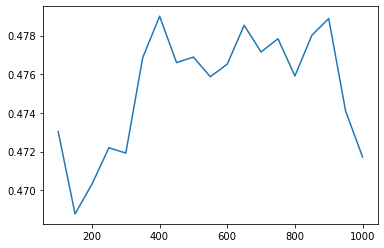

In [32]:
plt.plot(*zip(*result))

In [33]:
clf = BalancedRandomForestClassifier(n_estimators=400, max_depth=None, random_state=0)
s = make_scorer(f1_score, pos_label='bad')
scores = cross_val_score(clf, x_train_ignore, y_train_ignore, cv=5, scoring=s)
y_balanced_ignore = cross_val_predict(clf, x_train_ignore, y_train_ignore, cv=5)
print("f1_score: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

f1_score: 0.479 (+/- 0.028)


In [34]:
# printing confusion matrix for BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_ignore, y_balanced_ignore))
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_train_ignore, y_balanced_ignore))

[[165 107]
 [251 377]]
              precision    recall  f1-score   support

         bad       0.40      0.61      0.48       272
        good       0.78      0.60      0.68       628

    accuracy                           0.60       900
   macro avg       0.59      0.60      0.58       900
weighted avg       0.66      0.60      0.62       900



# 2.0 - Onehot, filling missing values w/ most frequent

In [35]:
# identifying most frequent values in savingAccount and checkingAccount
df_frequent = df_scaled.copy()
df_frequent['savingAccount'].value_counts() #786/1000 occurences of 0
df_frequent['checkingAccount'].value_counts() #668/1000 occurences of 0
df_frequent.head()

,age,job,savingAccount,checkingAccount,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,risk
0,0.857143,0.666667,NaN,0.000000,0.050567,0.029412,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,good
1,0.053571,0.666667,0.0,0.333333,0.313690,0.647059,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,bad
2,0.535714,0.333333,0.0,NaN,0.101574,0.117647,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,good
3,0.464286,0.666667,0.0,0.000000,0.419941,0.558824,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,good
4,0.607143,0.666667,0.0,0.000000,0.254209,0.294118,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bad


In [36]:
# replacing missing values with most frequent
df_frequent['savingAccount'].fillna(0, inplace=True)
df_frequent['checkingAccount'].fillna(0, inplace=True)
df_frequent.head()

,age,job,savingAccount,checkingAccount,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,risk
0,0.857143,0.666667,0.0,0.000000,0.050567,0.029412,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,good
1,0.053571,0.666667,0.0,0.333333,0.313690,0.647059,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,bad
2,0.535714,0.333333,0.0,0.000000,0.101574,0.117647,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,good
3,0.464286,0.666667,0.0,0.000000,0.419941,0.558824,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,good
4,0.607143,0.666667,0.0,0.000000,0.254209,0.294118,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bad


In [37]:
# separating 'frequent' training and testing datasets
from sklearn.model_selection import train_test_split
x_train_frequent, x_test_frequent, y_train_frequent, y_test_frequent = train_test_split(df_frequent.iloc[:,0:19], df_frequent['risk'], test_size=0.1, random_state=4)
x_train_frequent.head()

,age,job,savingAccount,checkingAccount,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
239,0.357143,0.666667,0.000000,0.000000,0.125014,0.382353,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
304,0.446429,0.666667,0.666667,0.000000,0.543469,0.647059,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
964,0.053571,0.333333,0.000000,0.333333,0.011225,0.029412,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
102,0.089286,0.666667,0.000000,0.000000,0.037526,0.029412,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
867,0.410714,0.666667,0.000000,0.000000,0.169528,0.117647,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 2.1 - K Nearest Neighbors

In [38]:
# best k
k = x_train_frequent.shape[0]**(1/2)
k

30.0

In [39]:
# model fitting for k nearest neighbors, using df_ignore
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
modelK = KNeighborsClassifier(n_neighbors=30)
modelK.fit(x_train_frequent, y_train_frequent)
s = make_scorer(f1_score, pos_label='bad')
scores = cross_val_score(modelK, x_train_frequent, y_train_frequent, cv=5, scoring=s)
y_knn_frequent = cross_val_predict(modelK, x_train_frequent, y_train_frequent, cv=5)
print("f1-score: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

f1-score: 0.156 (+/- 0.058)


In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_frequent, y_knn_frequent))
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_train_frequent, y_knn_frequent))

[[ 26 246]
 [ 31 597]]
              precision    recall  f1-score   support

         bad       0.46      0.10      0.16       272
        good       0.71      0.95      0.81       628

    accuracy                           0.69       900
   macro avg       0.58      0.52      0.48       900
weighted avg       0.63      0.69      0.61       900



# 2.2 - BalancedRandomForestClassifier

In [41]:
import warnings
warnings.filterwarnings('ignore')
from imblearn.ensemble import BalancedRandomForestClassifier 

min_estimators = 100
max_estimators = 1200
step = 50
result = []
max_score = 0
best_estimator = 0
for i in range(min_estimators, max_estimators+step, step):
    clf = BalancedRandomForestClassifier(n_jobs=-1, n_estimators=i, max_depth=None, random_state=0)
    s = make_scorer(f1_score, pos_label='bad')
    scores = cross_val_score(clf, x_train_frequent, y_train_frequent, cv=5, scoring=s)
    if max_score < scores.mean():
        max_score = scores.mean()
        best_estimator = i
    result.append((i, scores.mean()))
print(best_estimator)

500


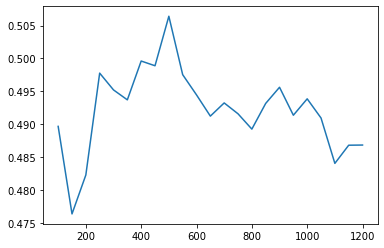

In [42]:
plt.plot(*zip(*result))

In [44]:
clf = BalancedRandomForestClassifier(n_estimators=500, max_depth=None, random_state=0)
s = make_scorer(f1_score, pos_label='bad')
scores = cross_val_score(clf, x_train_frequent, y_train_frequent, cv=5, scoring=s)
y_balanced_frequent = cross_val_predict(clf, x_train_frequent, y_train_frequent, cv=5)
print("f1_score: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

f1_score: 0.506 (+/- 0.039)


In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_frequent, y_balanced_frequent))
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_train_ignore, y_balanced_frequent))

[[177  95]
 [248 380]]
              precision    recall  f1-score   support

         bad       0.42      0.65      0.51       272
        good       0.80      0.61      0.69       628

    accuracy                           0.62       900
   macro avg       0.61      0.63      0.60       900
weighted avg       0.68      0.62      0.63       900



# 3.0 - Onehot, filling missing values w/ mean

In [46]:
# identifying mean for values savingAccount and checkingAccount
df_mean = df_scaled.copy()
df_mean['savingAccount'].describe() # mean = 0.152183
df_mean['checkingAccount'].describe() # mean = 0.1251925
df_mean.head()

,age,job,savingAccount,checkingAccount,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,risk
0,0.857143,0.666667,NaN,0.000000,0.050567,0.029412,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,good
1,0.053571,0.666667,0.0,0.333333,0.313690,0.647059,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,bad
2,0.535714,0.333333,0.0,NaN,0.101574,0.117647,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,good
3,0.464286,0.666667,0.0,0.000000,0.419941,0.558824,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,good
4,0.607143,0.666667,0.0,0.000000,0.254209,0.294118,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bad


In [47]:
# replacing missing values with mean
df_mean['savingAccount'].fillna(0.152183, inplace=True)
df_mean['checkingAccount'].fillna(0.1251925, inplace=True)
df_mean.head()

,age,job,savingAccount,checkingAccount,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,risk
0,0.857143,0.666667,0.152183,0.000000,0.050567,0.029412,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,good
1,0.053571,0.666667,0.000000,0.333333,0.313690,0.647059,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,bad
2,0.535714,0.333333,0.000000,0.125193,0.101574,0.117647,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,good
3,0.464286,0.666667,0.000000,0.000000,0.419941,0.558824,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,good
4,0.607143,0.666667,0.000000,0.000000,0.254209,0.294118,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bad


In [48]:
# separating 'mean' training and testing datasets
from sklearn.model_selection import train_test_split
x_train_mean, x_test_mean, y_train_mean, y_test_mean = train_test_split(df_mean.iloc[:,0:19], df_mean['risk'], test_size=0.1, random_state=4)
x_train_mean.head()

,age,job,savingAccount,checkingAccount,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
239,0.357143,0.666667,0.000000,0.000000,0.125014,0.382353,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
304,0.446429,0.666667,0.666667,0.125193,0.543469,0.647059,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
964,0.053571,0.333333,0.000000,0.333333,0.011225,0.029412,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
102,0.089286,0.666667,0.000000,0.125193,0.037526,0.029412,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
867,0.410714,0.666667,0.000000,0.125193,0.169528,0.117647,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 3.1 - K Nearest Neighbors

In [49]:
# best k
k = x_train_mean.shape[0]**(1/2)
k

30.0

In [50]:
# model fitting for k nearest neighbors, using df_ignore
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
modelK = KNeighborsClassifier(n_neighbors=30)
modelK.fit(x_train_mean, y_train_mean)
s = make_scorer(f1_score, pos_label='bad')
scores = cross_val_score(modelK, x_train_mean, y_train_mean, cv=5, scoring=s)
y_knn_mean = cross_val_predict(modelK, x_train_mean, y_train_mean, cv=5)
print("f1-score: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

f1-score: 0.146 (+/- 0.055)


In [51]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_mean, y_knn_mean))
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_train_mean, y_knn_mean))

[[ 24 248]
 [ 25 603]]
              precision    recall  f1-score   support

         bad       0.49      0.09      0.15       272
        good       0.71      0.96      0.82       628

    accuracy                           0.70       900
   macro avg       0.60      0.52      0.48       900
weighted avg       0.64      0.70      0.61       900



# 3.2 - BalancedRandomForestClassifier

In [52]:
import warnings
warnings.filterwarnings('ignore')
from imblearn.ensemble import BalancedRandomForestClassifier 

min_estimators = 100
max_estimators = 1000
step = 50
result = []
max_score = 0
best_estimator = 0
for i in range(min_estimators, max_estimators+step, step):
    clf = BalancedRandomForestClassifier(n_jobs=-1, n_estimators=i, max_depth=None, random_state=0)
    s = make_scorer(f1_score, pos_label='bad')
    scores = cross_val_score(clf, x_train_mean, y_train_mean, cv=5, scoring=s)
    if max_score < scores.mean():
        max_score = scores.mean()
        best_estimator = i
    result.append((i, scores.mean()))
print(best_estimator)

450


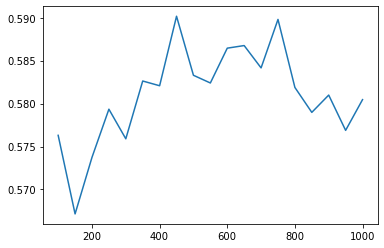

In [54]:
plt.plot(*zip(*result))

In [55]:
clf = BalancedRandomForestClassifier(n_estimators=450, max_depth=None, random_state=0)
s = make_scorer(f1_score, pos_label='bad')
scores = cross_val_score(clf, x_train_mean, y_train_mean, cv=5, scoring=s)
y_balanced_mean = cross_val_predict(clf, x_train_mean, y_train_mean, cv=5)
print("f1_score: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

f1_score: 0.590 (+/- 0.046)


In [56]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_mean, y_balanced_mean))
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_train_mean, y_balanced_mean))

[[197  75]
 [196 432]]
              precision    recall  f1-score   support

         bad       0.50      0.72      0.59       272
        good       0.85      0.69      0.76       628

    accuracy                           0.70       900
   macro avg       0.68      0.71      0.68       900
weighted avg       0.75      0.70      0.71       900

